### Setting up FourRooms

In [56]:
from deep_rl.component.fourrooms import *

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa912d814a8>,
 <matplotlib.image.AxesImage at 0x7fa912dab9e8>)

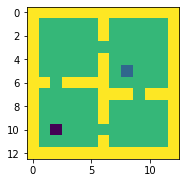

In [12]:
# goal locations - 21, 28, 84, 91
env = FourRooms(goal=84)
state = env.reset()
# print(state)
plt.subplot(121), plt.imshow(env.render())
# action = env.action_space.sample()
# state, reward, done, info = env.step(action)
# print(reward, done, info)
# plt.subplot(122), plt.imshow(state.reshape((13,13))); plt.show()
# print(action)

In [ ]:
env.observation_space

### Run DQN on 4 rooms

In [1]:
from deep_rl import *
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm
import random
import numpy as np
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
select_device(0)

In [24]:
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim, hidden_units=(16,)))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 3e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 0
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 5e4
    config.async_actor = False
    agent = DQNAgent(config)
    #run_steps function below
    config = agent.config
    agent_name = agent.__class__.__name__
    t0 = time.time()
    while True:
        if config.save_interval and not agent.total_steps % config.save_interval:
            agent.save('data/%s-%s-%d' % (agent_name, config.tag, agent.total_steps))
        if config.log_interval and not agent.total_steps % config.log_interval:
            t0 = time.time()
        if config.eval_interval and not agent.total_steps % config.eval_interval:
            agent.eval_episodes()
            pass
        if config.max_steps and agent.total_steps >= config.max_steps:
            return agent
            break
        agent.step()
        agent.switch_task()
    return agent

2020-06-18 16:01:44,582 - root - INFO: steps 0, episodic_return_test -160.10(25.24)
2020-06-18 16:01:49,691 - root - INFO: steps 5000, episodic_return_test -141.30(28.36)
2020-06-18 16:01:54,292 - root - INFO: steps 10000, episodic_return_test -23.90(18.58)
2020-06-18 16:01:58,867 - root - INFO: steps 15000, episodic_return_test -25.30(18.43)
2020-06-18 16:02:03,340 - root - INFO: steps 20000, episodic_return_test -5.70(1.10)
2020-06-18 16:02:07,880 - root - INFO: steps 25000, episodic_return_test -8.00(1.27)
2020-06-18 16:02:12,397 - root - INFO: steps 30000, episodic_return_test -8.20(1.40)
2020-06-18 16:02:16,931 - root - INFO: steps 35000, episodic_return_test -7.90(1.10)
2020-06-18 16:02:21,414 - root - INFO: steps 40000, episodic_return_test -6.20(1.17)
2020-06-18 16:02:26,031 - root - INFO: steps 45000, episodic_return_test -27.90(18.16)
2020-06-18 16:02:30,492 - root - INFO: steps 50000, episodic_return_test -5.40(1.11)


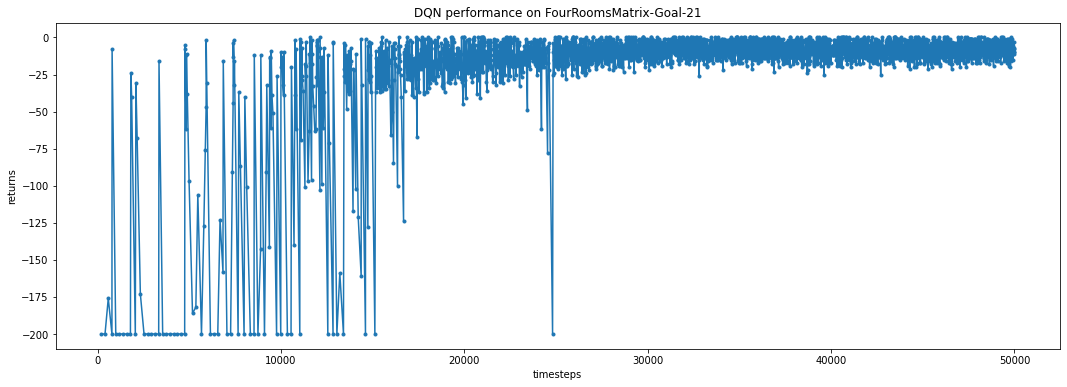

2020-06-18 16:02:31,321 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-18 16:02:36,203 - root - INFO: steps 5000, episodic_return_test -120.40(30.83)
2020-06-18 16:02:41,010 - root - INFO: steps 10000, episodic_return_test -63.60(28.25)
2020-06-18 16:02:45,538 - root - INFO: steps 15000, episodic_return_test -5.60(0.71)
2020-06-18 16:02:50,050 - root - INFO: steps 20000, episodic_return_test -7.10(1.21)
2020-06-18 16:02:54,544 - root - INFO: steps 25000, episodic_return_test -5.00(0.81)
2020-06-18 16:02:59,106 - root - INFO: steps 30000, episodic_return_test -7.40(0.94)
2020-06-18 16:03:03,620 - root - INFO: steps 35000, episodic_return_test -4.90(1.13)
2020-06-18 16:03:08,105 - root - INFO: steps 40000, episodic_return_test -7.80(1.44)
2020-06-18 16:03:12,602 - root - INFO: steps 45000, episodic_return_test -6.30(1.10)
2020-06-18 16:03:17,099 - root - INFO: steps 50000, episodic_return_test -5.60(1.25)


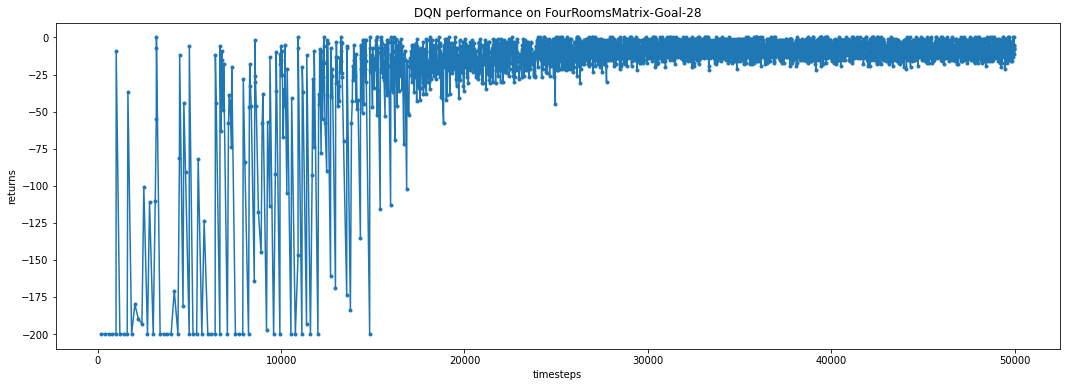

2020-06-18 16:03:17,898 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-18 16:03:22,676 - root - INFO: steps 5000, episodic_return_test -120.90(30.64)
2020-06-18 16:03:27,598 - root - INFO: steps 10000, episodic_return_test -160.70(24.86)
2020-06-18 16:03:32,095 - root - INFO: steps 15000, episodic_return_test -28.10(18.14)
2020-06-18 16:03:36,470 - root - INFO: steps 20000, episodic_return_test -6.80(1.45)
2020-06-18 16:03:40,867 - root - INFO: steps 25000, episodic_return_test -8.00(1.46)
2020-06-18 16:03:45,251 - root - INFO: steps 30000, episodic_return_test -8.70(1.18)
2020-06-18 16:03:49,671 - root - INFO: steps 35000, episodic_return_test -7.10(1.17)
2020-06-18 16:03:54,038 - root - INFO: steps 40000, episodic_return_test -8.20(1.22)
2020-06-18 16:03:58,372 - root - INFO: steps 45000, episodic_return_test -5.60(1.23)
2020-06-18 16:04:02,752 - root - INFO: steps 50000, episodic_return_test -10.00(1.33)


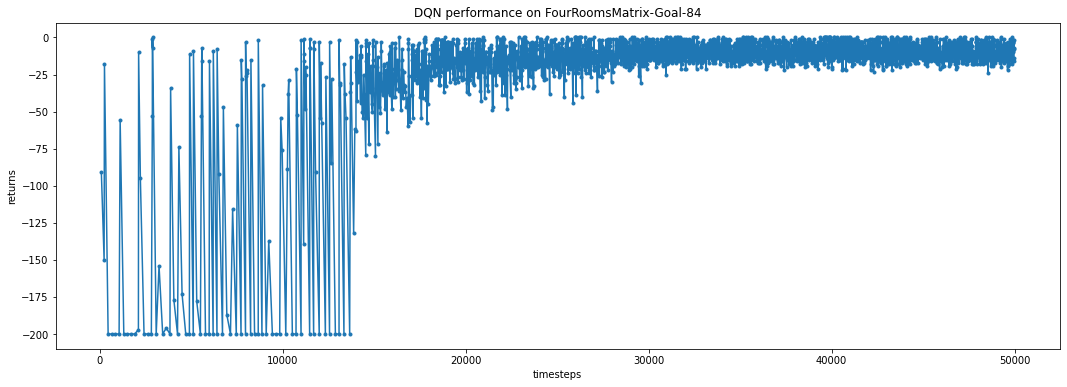

2020-06-18 16:04:03,524 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-06-18 16:04:08,465 - root - INFO: steps 5000, episodic_return_test -160.40(25.05)
2020-06-18 16:04:13,277 - root - INFO: steps 10000, episodic_return_test -121.50(30.41)
2020-06-18 16:04:17,966 - root - INFO: steps 15000, episodic_return_test -81.80(30.52)
2020-06-18 16:04:22,536 - root - INFO: steps 20000, episodic_return_test -46.30(24.32)
2020-06-18 16:04:26,999 - root - INFO: steps 25000, episodic_return_test -6.30(0.91)
2020-06-18 16:04:31,413 - root - INFO: steps 30000, episodic_return_test -7.70(0.99)
2020-06-18 16:04:35,828 - root - INFO: steps 35000, episodic_return_test -5.00(1.23)
2020-06-18 16:04:40,125 - root - INFO: steps 40000, episodic_return_test -7.70(1.38)
2020-06-18 16:04:44,501 - root - INFO: steps 45000, episodic_return_test -7.50(1.16)
2020-06-18 16:04:48,932 - root - INFO: steps 50000, episodic_return_test -8.80(1.46)


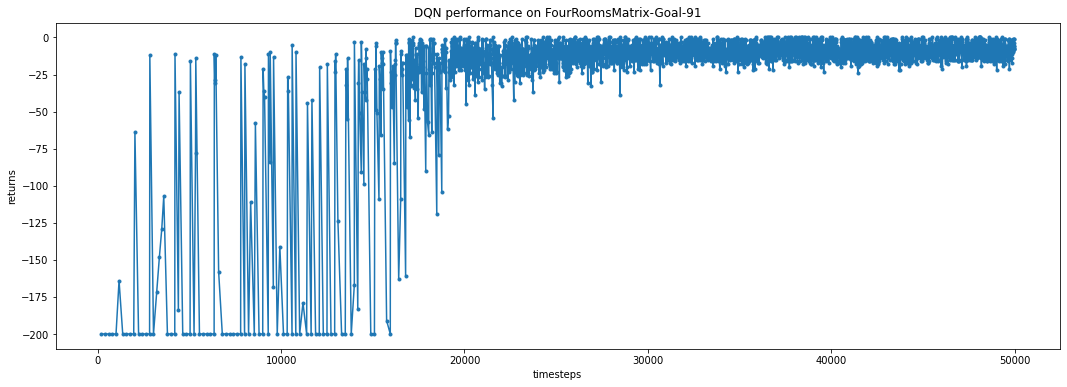

In [7]:
agents = []
goals = [21, 28, 84, 91]
for g in goals:
    game = 'FourRoomsMatrix-Goal-'+str(g)
    agents.append(dqn_feature(game=game))
    plt.figure(figsize=(18,6))
    plt.plot(np.array(agents[-1].returns)[:,0], np.array(agents[-1].returns)[:,1], '.-')
    plt.xlabel('timesteps'), plt.ylabel('returns')
    plt.title('DQN performance on ' + game), plt.show()

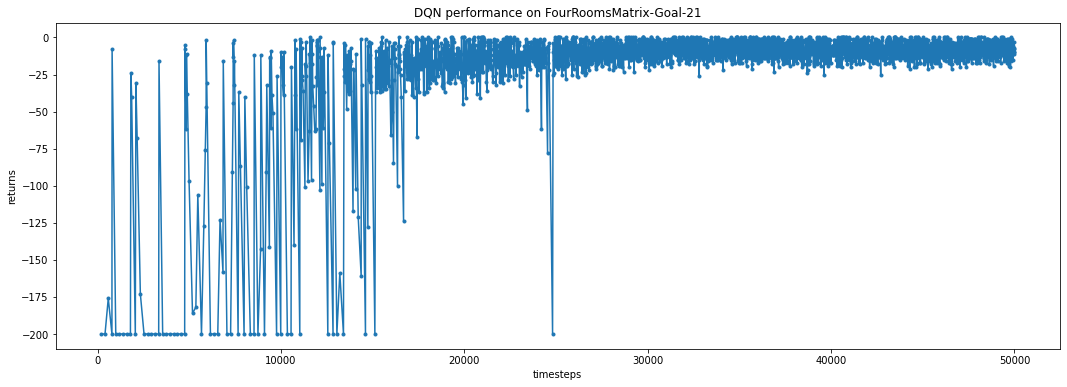

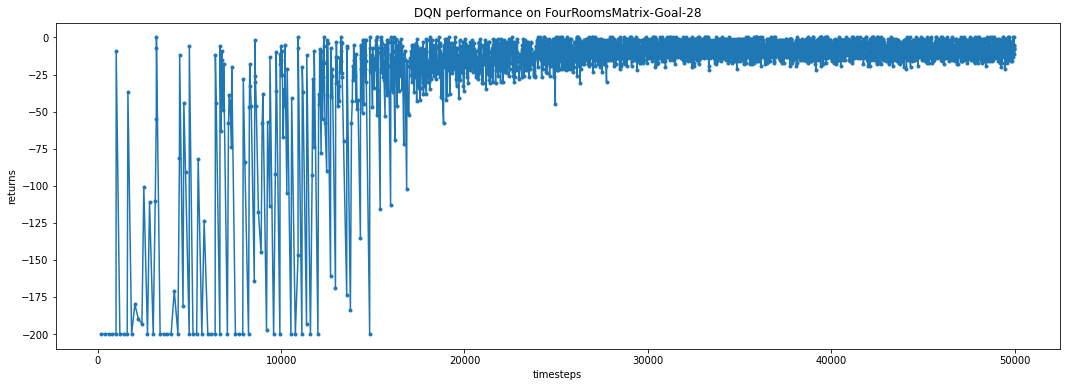

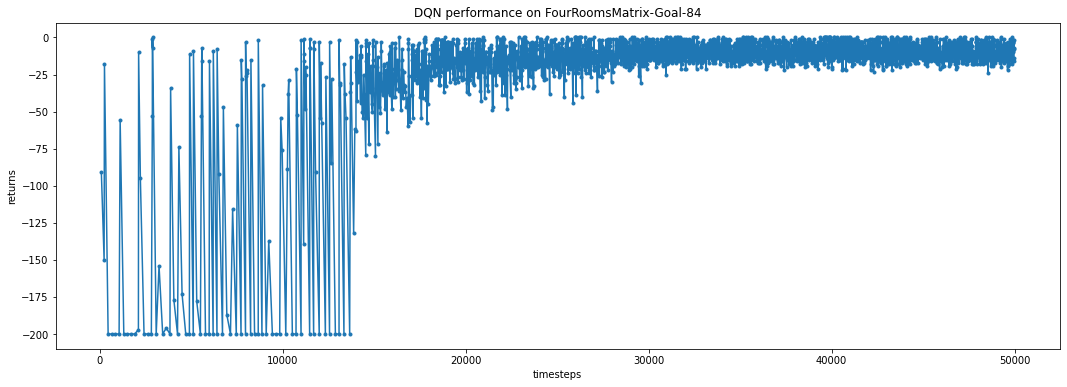

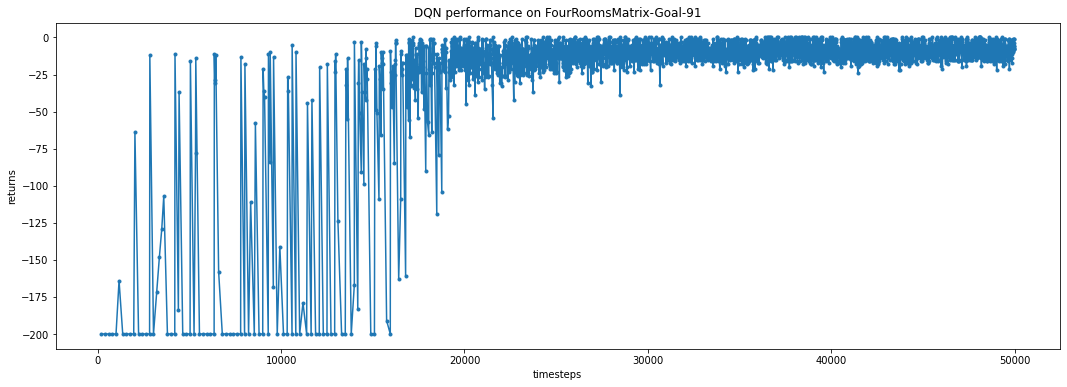

In [8]:
goals = [21, 28, 84, 91]
for i, g in enumerate(goals):
    game = 'FourRoomsMatrix-Goal-'+str(g)
#     agents.append(dqn_feature(game=game))
    plt.figure(figsize=(18,6))
    plt.plot(np.array(agents[i].returns)[:,0], np.array(agents[i].returns)[:,1], '.-')
    plt.xlabel('timesteps'), plt.ylabel('returns')
    plt.title('DQN performance on ' + game), plt.show()

In [35]:
def avdsr_feature(**kwargs):
    kwargs['tag'] = 'Training avDSR based on DQN agents'
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.002)
    config.network_fn = lambda: SRNet(config.action_dim, SRIdentityBody(config.state_dim), hidden_units=(), config=0) #CHECK
    config.replay_fn = lambda: Replay(memory_size=int(4e5), batch_size=10)

    config.random_action_prob = LinearSchedule(1, 1, 1e4) # CHECK
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 0
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.max_steps = 3e5
    config.async_actor = False
    
    agent = avDSRAgent(config, config.agents, style='DQN')
    #run_steps function below
    config = agent.config
    agent_name = agent.__class__.__name__
    t0 = time.time()
    while True:
        if config.log_interval and not agent.total_steps % config.log_interval:
            agent.logger.info('steps %d, %.2f steps/s' % (agent.total_steps, config.log_interval / (time.time() - t0)))
            t0 = time.time()
        if config.max_steps and agent.total_steps >= config.max_steps:
            return agent
            break
        agent.step()
        agent.switch_task()

In [36]:
avdsr = avdsr_feature(game='FourRoomsMatrixNoTerm', agents=agents, choice=0)

2020-06-18 16:45:10,458 - root - INFO: steps 0, 262144000.00 steps/s
2020-06-18 16:45:11,741 - root - INFO: steps 1000, 782.52 steps/s
2020-06-18 16:45:12,969 - root - INFO: steps 2000, 815.41 steps/s
2020-06-18 16:45:14,177 - root - INFO: steps 3000, 828.68 steps/s
2020-06-18 16:45:15,368 - root - INFO: steps 4000, 840.99 steps/s
2020-06-18 16:45:16,563 - root - INFO: steps 5000, 837.56 steps/s
2020-06-18 16:45:17,809 - root - INFO: steps 6000, 806.08 steps/s
2020-06-18 16:45:19,021 - root - INFO: steps 7000, 825.34 steps/s
2020-06-18 16:45:20,262 - root - INFO: steps 8000, 806.78 steps/s
2020-06-18 16:45:21,452 - root - INFO: steps 9000, 842.41 steps/s
2020-06-18 16:45:22,670 - root - INFO: steps 10000, 821.60 steps/s
2020-06-18 16:45:23,870 - root - INFO: steps 11000, 834.34 steps/s
2020-06-18 16:45:25,100 - root - INFO: steps 12000, 814.21 steps/s
2020-06-18 16:45:26,274 - root - INFO: steps 13000, 852.26 steps/s
2020-06-18 16:45:27,530 - root - INFO: steps 14000, 797.37 steps/s
20

In [ ]:
def visualize_vector(vector, title="unnamed", show_goal=False, show=True, label=None):
    """Function to visualize vector of size 104"""
    
    current_grid = np.array(env.occupancy, dtype=np.float)
    for i in range(160):
        p_cell = env.tocell[i]
        current_grid[p_cell[0], p_cell[1]] = vector[i]

        if show_goal:
            goal_cell = env.tocell[env.goal]
            current_grid[goal_cell[0], goal_cell[1]] = -1
        
    plt.imshow(current_grid), plt.colorbar()
    plt.title(title)
    if show:
        plt.show()

state = np.zeros(len(avdsr.replay.data))
for i in range(len(avdsr.replay.data)):
    state[i] = np.argmax(avdsr.replay.data[i][0])
print(set(state))
counts = np.zeros(160)
for i in range(len(avdsr.replay.data)):
    counts[int(state[i])] += 1
plt.subplot(121)
plt.plot(counts)
plt.subplot(122)
visualize_vector(counts, title='choice = '+str(avdsr.choice))
print(avdsr.choice)

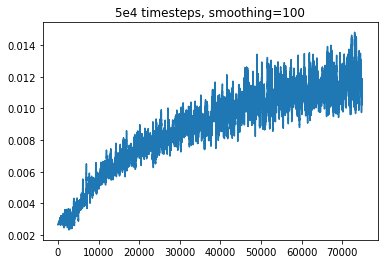

(Text(0.5, 1.0, '5e4 timesteps, smoothing=100'), None)

In [37]:
loss_lr_em3 = avdsr.loss_vec
kernel = 100
plt.plot(convolve(avdsr.loss_vec, kernel))
plt.title('5e4 timesteps, smoothing=' + str(kernel)), plt.show()
# plt.subplot(122), plt.plot(avdsr.retu)

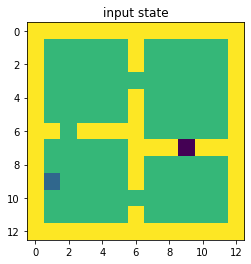

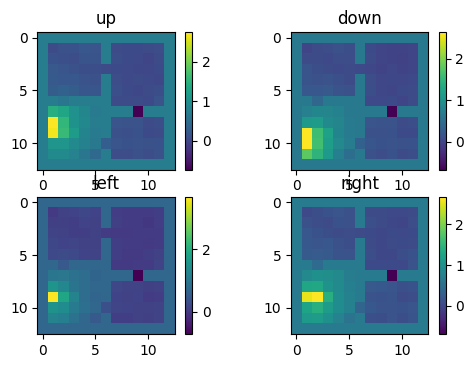

In [38]:
from deep_rl.component.fourrooms import FourRoomsMatrix
env = FourRoomsMatrix()
state = env.reset()
state = env.reset()
env.step(env.action_space.sample())
env.step(env.action_space.sample())
env.step(env.action_space.sample())
# env.current_cell = (5,5)
state, _, _, _ = env.step(env.action_space.sample())
plt.imshow(env.render()); plt.title('input state'), plt.show()
_, out, _ = avdsr.network(tensor(state).unsqueeze(0))

dirs = {0: 'up', 1: 'down', 2:'left', 3:'right'}

plt.figure(dpi=100)
psi = out.detach().cpu().numpy()
for i in range(4):
    psi_a = psi[0,i,:]
    plt.subplot(2,2,i+1)
    plt.imshow(psi_a.reshape((13,13)))
    plt.title(dirs[i])
    plt.colorbar()

plt.show()

In [39]:
params_count(avdsr.network.psi2q)

169

### Comparing performance:

Likely to improve if DSR is trained for longer with a smaller learning rate

- DQN: 169 -> 676 -> 4
- avDSR: 169 -> 676 -> 4

In [40]:
def dsr_feature_init(ref,style1,**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: SRNet(config.action_dim, SRIdentityBody(config.state_dim), config=style1)
    config.replay_fn = lambda: Replay(memory_size=int(1e5), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 3e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 0
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 5e4
    config.async_actor = False
    
    agent = DSRAgent(config)
    #run_steps function below
    config = agent.config
    agent_name = agent.__class__.__name__
    if(ref is not None):
        print(agent.network.load_state_dict(ref.network.state_dict(), strict=False))
    t0 = time.time()
    while True:
        if config.save_interval and not agent.total_steps % config.save_interval:
            agent.save('data/%s-%s-%d' % (agent_name, config.tag, agent.total_steps))
        if config.log_interval and not agent.total_steps % config.log_interval:
#             agent.logger.info('steps %d, %.2f steps/s' % (agent.total_steps, config.log_interval / (time.time() - t0)))
            t0 = time.time()
        if config.eval_interval and not agent.total_steps % config.eval_interval:
            agent.eval_episodes()
        if config.max_steps and agent.total_steps >= config.max_steps:
            return agent
            break
#         import pdb; pdb.set_trace()
        agent.step()
        agent.switch_task()
        
    return agent

In [41]:
def runNAgents(function, runs, style1, store=True, freeze=0, ref=None):
    r_dqn = []; t_dqn = []
    if(store):
        agents = []
    for i in range(runs): 
        agent = function(game='FourRoomsMatrix', freeze=freeze, ref=ref, style1=style1)
        rewards = np.array(agent.returns)
        t_dqn.append(rewards[:,0])
        r_dqn.append(rewards[:,1])
        if(store):
            agents.append(agent)
            
    if(store):
        return agents, t_dqn, r_dqn
    
    return t_dqn, r_dqn

In [42]:
# r_c0ep8 = runNAgents(dsr_feature_init, runs=3, freeze=2, ref=avdsr,style1=0)
# r_c1ep8 = runNAgents(dsr_feature_init, runs=3, freeze=2, ref=avdsr,style1=1)
r_c0e1 = runNAgents(dsr_feature_init, runs=3, freeze=2, ref=avdsr,style1=0)
r_c1e1 = runNAgents(dsr_feature_init, runs=3, freeze=2, ref=avdsr,style1=1)
# r_dqn_base_16 = runNAgents(dqn_feature, runs=3,style1=0)
# r_dqn_base_676 = runNAgents(dqn_feature, runs=3)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])


2020-06-18 16:51:25,701 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-06-18 16:51:31,176 - root - INFO: steps 5000, episodic_return_test -43.00(24.83)
2020-06-18 16:51:36,492 - root - INFO: steps 10000, episodic_return_test -25.60(18.39)
2020-06-18 16:51:41,821 - root - INFO: steps 15000, episodic_return_test -24.10(18.56)
2020-06-18 16:51:47,094 - root - INFO: steps 20000, episodic_return_test -5.50(0.92)
2020-06-18 16:51:52,321 - root - INFO: steps 25000, episodic_return_test -7.90(0.83)
2020-06-18 16:51:57,582 - root - INFO: steps 30000, episodic_return_test -6.30(1.29)
2020-06-18 16:52:02,808 - root - INFO: steps 35000, episodic_return_test -5.80(1.19)
2020-06-18 16:52:08,017 - root - INFO: steps 40000, episodic_return_test -4.80(1.29)
2020-06-18 16:52:13,256 - root - INFO: steps 45000, episodic_return_test -7.70(1.11)
2020-06-18 16:52:18,514 - root - INFO: steps 50000, episodic_return_test -6.30(0.92)


IncompatibleKeys(missing_keys=[], unexpected_keys=[])


2020-06-18 16:52:19,145 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-06-18 16:52:24,714 - root - INFO: steps 5000, episodic_return_test -122.20(30.13)
2020-06-18 16:52:30,084 - root - INFO: steps 10000, episodic_return_test -42.20(24.95)
2020-06-18 16:52:35,297 - root - INFO: steps 15000, episodic_return_test -3.50(0.93)
2020-06-18 16:52:40,444 - root - INFO: steps 20000, episodic_return_test -4.40(1.02)
2020-06-18 16:52:45,679 - root - INFO: steps 25000, episodic_return_test -3.60(0.99)
2020-06-18 16:52:50,889 - root - INFO: steps 30000, episodic_return_test -6.90(1.16)
2020-06-18 16:52:56,157 - root - INFO: steps 35000, episodic_return_test -4.30(0.78)
2020-06-18 16:53:01,435 - root - INFO: steps 40000, episodic_return_test -7.30(1.30)
2020-06-18 16:53:06,616 - root - INFO: steps 45000, episodic_return_test -7.10(1.21)
2020-06-18 16:53:11,842 - root - INFO: steps 50000, episodic_return_test -6.90(1.04)


IncompatibleKeys(missing_keys=[], unexpected_keys=[])


2020-06-18 16:53:12,452 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-06-18 16:53:17,765 - root - INFO: steps 5000, episodic_return_test -43.00(24.83)
2020-06-18 16:53:23,117 - root - INFO: steps 10000, episodic_return_test -25.60(18.39)
2020-06-18 16:53:28,419 - root - INFO: steps 15000, episodic_return_test -24.10(18.56)
2020-06-18 16:53:33,630 - root - INFO: steps 20000, episodic_return_test -5.50(0.92)
2020-06-18 16:53:39,218 - root - INFO: steps 25000, episodic_return_test -7.90(0.83)
2020-06-18 16:53:44,461 - root - INFO: steps 30000, episodic_return_test -6.30(1.29)
2020-06-18 16:53:49,692 - root - INFO: steps 35000, episodic_return_test -5.80(1.19)
2020-06-18 16:53:54,903 - root - INFO: steps 40000, episodic_return_test -4.80(1.29)
2020-06-18 16:54:00,384 - root - INFO: steps 45000, episodic_return_test -7.70(1.11)
2020-06-18 16:54:05,925 - root - INFO: steps 50000, episodic_return_test -6.30(0.92)


IncompatibleKeys(missing_keys=['psi2q.layers.0.weight', 'psi2q.layers.0.bias'], unexpected_keys=['psi2q.w'])


2020-06-18 16:54:06,759 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-06-18 16:54:12,839 - root - INFO: steps 5000, episodic_return_test -61.50(28.67)
2020-06-18 16:54:18,579 - root - INFO: steps 10000, episodic_return_test -25.00(18.48)
2020-06-18 16:54:24,388 - root - INFO: steps 15000, episodic_return_test -4.20(1.01)
2020-06-18 16:54:30,104 - root - INFO: steps 20000, episodic_return_test -7.60(1.06)
2020-06-18 16:54:35,782 - root - INFO: steps 25000, episodic_return_test -5.60(1.26)
2020-06-18 16:54:41,488 - root - INFO: steps 30000, episodic_return_test -6.40(1.28)
2020-06-18 16:54:47,263 - root - INFO: steps 35000, episodic_return_test -7.10(0.89)
2020-06-18 16:54:53,453 - root - INFO: steps 40000, episodic_return_test -5.30(1.24)
2020-06-18 16:54:59,572 - root - INFO: steps 45000, episodic_return_test -6.00(1.17)
2020-06-18 16:55:05,634 - root - INFO: steps 50000, episodic_return_test -7.10(1.11)


IncompatibleKeys(missing_keys=['psi2q.layers.0.weight', 'psi2q.layers.0.bias'], unexpected_keys=['psi2q.w'])


2020-06-18 16:55:06,352 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-06-18 16:55:12,861 - root - INFO: steps 5000, episodic_return_test -101.70(31.09)
2020-06-18 16:55:19,342 - root - INFO: steps 10000, episodic_return_test -121.60(30.37)
2020-06-18 16:55:25,540 - root - INFO: steps 15000, episodic_return_test -24.00(18.57)
2020-06-18 16:55:31,861 - root - INFO: steps 20000, episodic_return_test -62.90(28.40)
2020-06-18 16:55:37,873 - root - INFO: steps 25000, episodic_return_test -43.90(24.70)
2020-06-18 16:55:43,728 - root - INFO: steps 30000, episodic_return_test -7.20(1.38)
2020-06-18 16:55:49,587 - root - INFO: steps 35000, episodic_return_test -4.10(0.90)
2020-06-18 16:55:55,457 - root - INFO: steps 40000, episodic_return_test -7.80(1.16)
2020-06-18 16:56:01,347 - root - INFO: steps 45000, episodic_return_test -6.80(0.90)
2020-06-18 16:56:07,154 - root - INFO: steps 50000, episodic_return_test -7.90(0.95)


IncompatibleKeys(missing_keys=['psi2q.layers.0.weight', 'psi2q.layers.0.bias'], unexpected_keys=['psi2q.w'])


2020-06-18 16:56:07,858 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-06-18 16:56:14,045 - root - INFO: steps 5000, episodic_return_test -101.70(31.09)
2020-06-18 16:56:20,258 - root - INFO: steps 10000, episodic_return_test -102.10(30.96)
2020-06-18 16:56:26,552 - root - INFO: steps 15000, episodic_return_test -121.10(30.56)
2020-06-18 16:56:32,370 - root - INFO: steps 20000, episodic_return_test -6.40(0.94)
2020-06-18 16:56:38,199 - root - INFO: steps 25000, episodic_return_test -5.90(0.75)
2020-06-18 16:56:44,030 - root - INFO: steps 30000, episodic_return_test -6.00(1.16)
2020-06-18 16:56:49,895 - root - INFO: steps 35000, episodic_return_test -5.90(1.20)
2020-06-18 16:56:55,757 - root - INFO: steps 40000, episodic_return_test -5.40(1.11)
2020-06-18 16:57:01,565 - root - INFO: steps 45000, episodic_return_test -7.40(1.10)
2020-06-18 16:57:07,466 - root - INFO: steps 50000, episodic_return_test -5.80(1.19)


In [51]:
def plot_rewards(rewards, plot_seperate=True , clip=50000, title='unnamed'):
    smooth = 5000
    
    colors = ['red', 'blue', 'green', 'm', 'k', 'y', '#ec7603', '#34495e']
    
    plt.figure(figsize=(18,6), dpi=200)
    if(plot_seperate):
        for k, v in rewards.items():
            for t, r in zip(v[0], v[1]):
                plt.plot(t, r, label=k)
        plt.legend(), plt.show()
        return
    
    for j, (k, v) in enumerate(rewards.items()):
        r_vec = np.zeros((len(v[0]), clip-smooth+1))
        for i, (t, r) in enumerate(zip(v[0], v[1])):
            r_vec[i,:] = convolve(np.interp(np.arange(clip), t, r), smooth)
    
        mean = np.mean(np.array(r_vec), axis=0)
        std = np.std(np.array(r_vec), axis=0)
        plt.plot(mean, label=k, color=colors[j])
        plt.fill_between(np.arange(0, len(mean)), mean+std, mean-std, facecolor=colors[j], alpha=0.3)
    
    plt.xlabel('timesteps'), plt.ylabel('episodic returns')
    plt.title(title)
    plt.legend(loc='lower right'), plt.show()

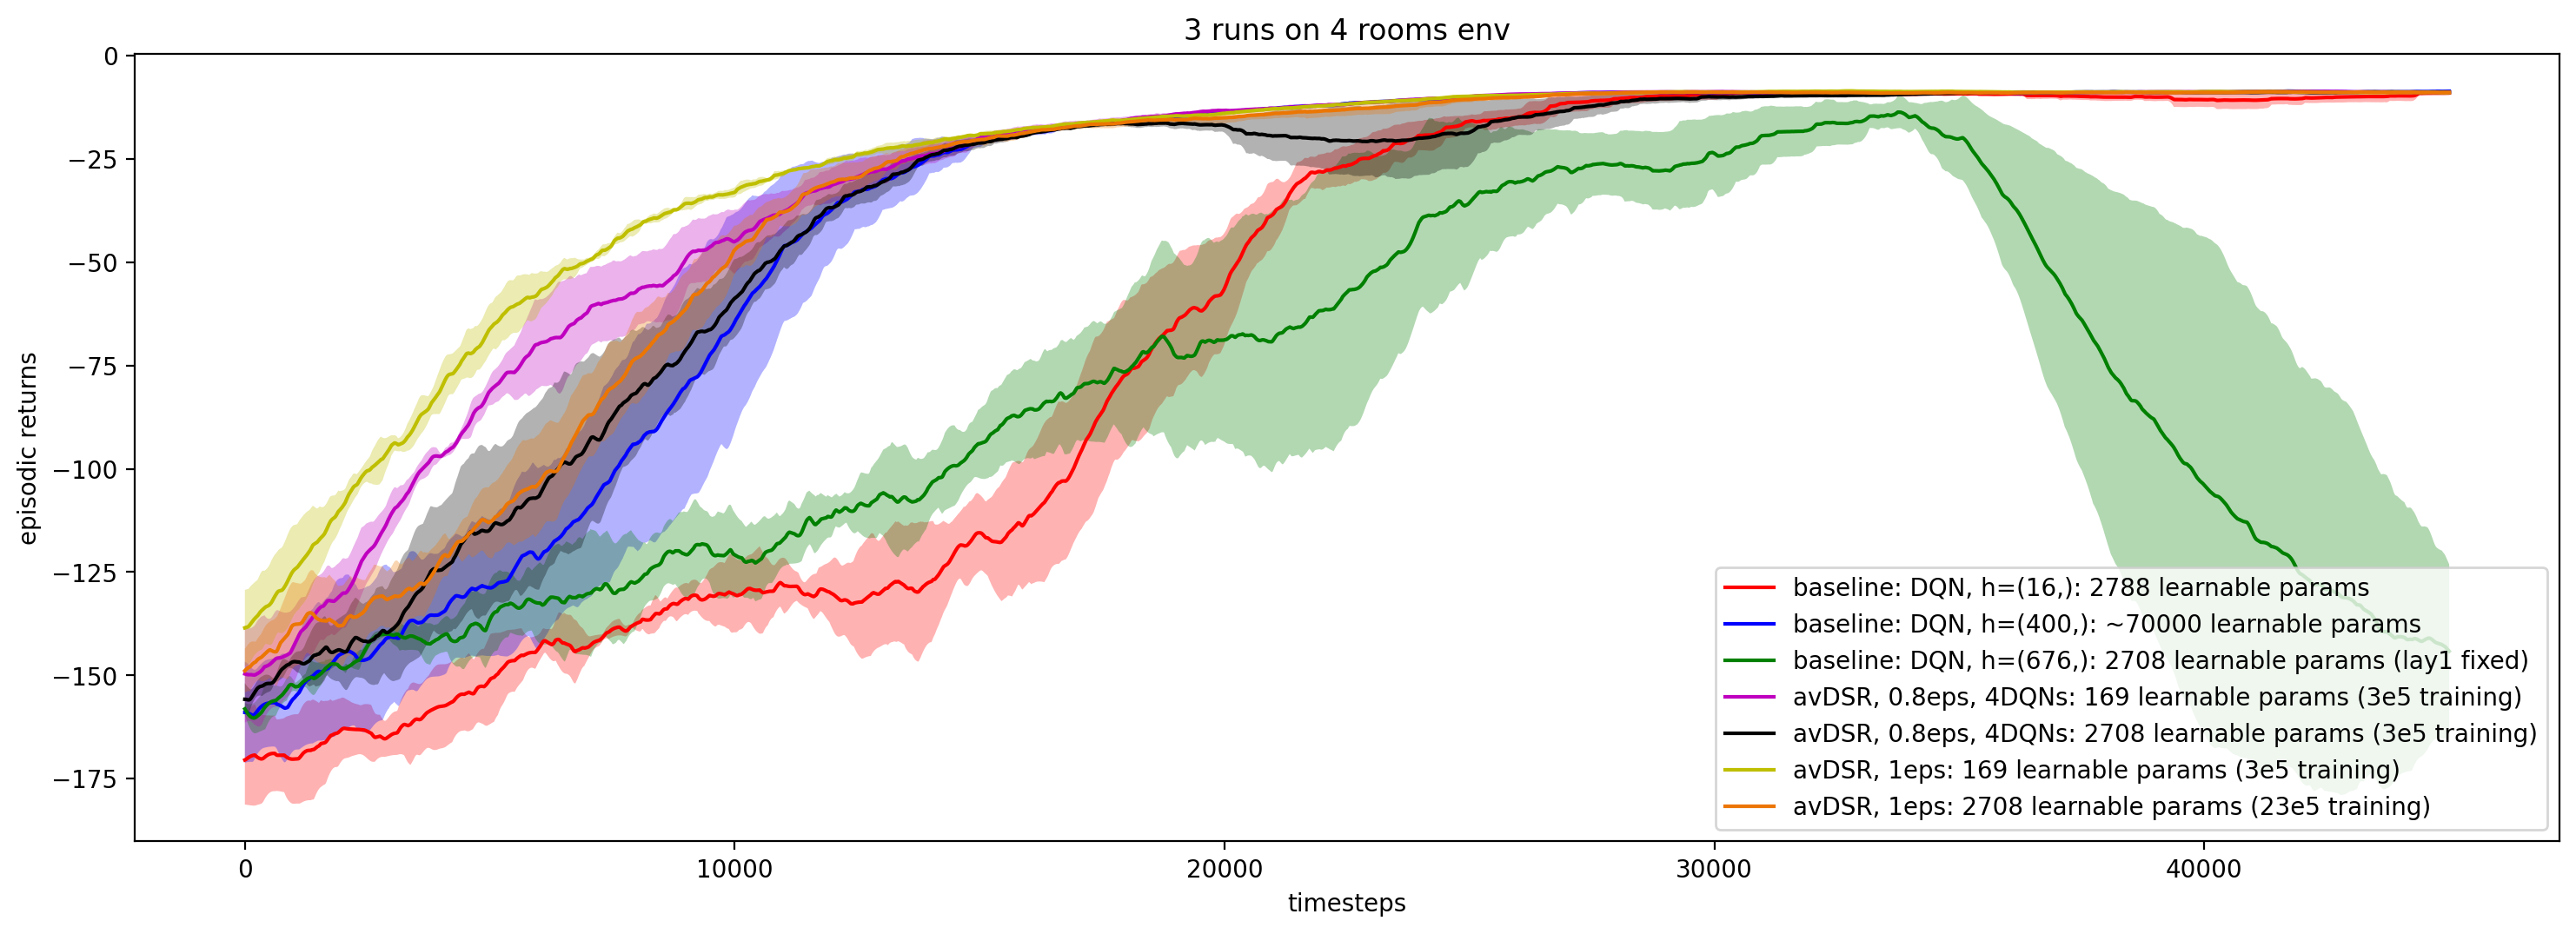

In [53]:
rewards_dict = {
                'baseline: DQN, h=(16,): 2788 learnable params': r_dqn_base_16[1:],
                'baseline: DQN, h=(400,): ~70000 learnable params': r_dqn_base_676[1:],
                'baseline: DQN, h=(676,): 2708 learnable params (lay1 fixed)': r_dqn_base,
               'avDSR, 0.8eps, 4DQNs: 169 learnable params (3e5 training)': r_c0ep8[1:],
               'avDSR, 0.8eps, 4DQNs: 2708 learnable params (3e5 training)': r_c1ep8[1:],
               'avDSR, 1eps: 169 learnable params (3e5 training)': r_c0e1[1:],
               'avDSR, 1eps: 2708 learnable params (23e5 training)': r_c1e1[1:],
                
               }

plot_rewards(rewards_dict, plot_seperate=False, title='3 runs on 4 rooms env')

In [55]:
import pickle
    
# with open('storage/5b-main-generalization-all-baselines.p', 'wb') as f:
#     pickle.dump(rewards_dict, f, pickle.HIGHEST_PROTOCOL)
    
# with open('storage/5b-main-generalization-all-baselines.p', 'rb') as f:
#     rewards = pickle.load(f)
# print(rewards.keys())
# # r_dsr_rand = rewards['avDSR, 1eps: 169 learnable params']
# r_dqn_base = rewards['DQN shuffled layer 1 weights, fine tuning 0 init fc layer']

dict_keys(['baseline: DQN, h=(16,): 2788 learnable params', 'baseline: DQN, h=(400,): ~70000 learnable params', 'baseline: DQN, h=(676,): 2708 learnable params (lay1 fixed)', 'avDSR, 0.8eps, 4DQNs: 169 learnable params (3e5 training)', 'avDSR, 0.8eps, 4DQNs: 2708 learnable params (3e5 training)', 'avDSR, 1eps: 169 learnable params (3e5 training)', 'avDSR, 1eps: 2708 learnable params (23e5 training)'])


### ROUGH BELOW

In [10]:
"""
Adopted from https://github.com/alversafa/option-critic-arch/blob/master/fourrooms.py.

Modified to return one hot encoded states and gym compatible.

"""

import numpy as np
from gym.utils import seeding
from gym import spaces
import gym

class FourRoomsMatrix(gym.Env):

    def __init__(self, goal=62, p=0, config=2):
        """
        config -> configouration of the state space
            0 - returns tabular index of the state
            1 - returns one hot encoded vector of the state
            2 - returns matrix form of the state
        """
        layout = """\
wwwwwwwwwwwww
w     w     w
w     w     w
w           w
w     w     w
w     w     w
ww wwww     w
w     www www
w     w     w
w     w     w
w           w
w     w     w
wwwwwwwwwwwww
"""
        self.p = p # Stocasticity the environment
        self.config = config
        self.occupancy = np.array([list(map(lambda c: 1 if c=='w' else 0, line)) for line in layout.splitlines()])
        
        # Four possible actions
        # 0: UP
        # 1: DOWN
        # 2: LEFT
        # 3: RIGHT
        self.a_space = np.array([0, 1, 2, 3])
        self.obs_space = np.zeros(np.sum(self.occupancy == 0))
        self.observation_space = spaces.Box(low=np.zeros(np.sum(self.occupancy == 0)), high=np.ones(np.sum(self.occupancy == 0)), dtype=np.uint8)
        self.action_space = spaces.Discrete(4)
        self.directions = [np.array((-1,0)), np.array((1,0)), np.array((0,-1)), np.array((0,1))]

        # Random number generator
        self.rng = np.random.RandomState(1234)

        self.tostate = {}
        statenum = 0
        for i in range(13):
            for j in range(13):
                if self.occupancy[i,j] == 0:
                    self.tostate[(i,j)] = statenum
                    statenum += 1
        self.tocell = {v:k for k, v in self.tostate.items()}


        self.goal = goal # East doorway
        self.init_states = list(range(self.obs_space.shape[0]))
        self.init_states.remove(self.goal)
        self.updates = 0
        self.horizon = 200


    def render(self, show_goal=True):
        current_grid = np.array(self.occupancy)
        current_grid[self.current_cell[0], self.current_cell[1]] = -1
        if show_goal:
            goal_cell = self.tocell[self.goal]
            current_grid[goal_cell[0], goal_cell[1]] = -2
        return current_grid

    def seed(self, seed=None):
        """
        Setting the seed of the agent for replication
        """
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        state = self.rng.choice(self.init_states)
        # state = 0 # fix starting state
        self.current_cell = self.tocell[state]
        if(self.config == 0):
            return state
        elif(self.config == 1):
            temp = np.zeros(len(self.obs_space))
            temp[state] = 1
            self.updates = 0
            return temp
        elif(self.config == 2):
            return env.render()
        else:
            raise
            

    def check_available_cells(self, cell):
        available_cells = []

        for action in range(len(self.a_space)):
            next_cell = tuple(cell + self.directions[action])

            if not self.occupancy[next_cell]:
                available_cells.append(next_cell)

        return available_cells
        

    def step(self, action):
        '''
        Takes a step in the environment with 1-self.p probability. And takes a step in the
        other directions with probability self.p with all of them being equally likely.
        '''
        self.updates += 1

        next_cell = tuple(self.current_cell + self.directions[action])

        if not self.occupancy[next_cell]:

            if self.rng.uniform() < self.p:
                available_cells = self.check_available_cells(self.current_cell)
                self.current_cell = available_cells[self.rng.randint(len(available_cells))]

            else:
                self.current_cell = next_cell

        state = self.tostate[self.current_cell]

        # When goal is reached, it is done
        done = state == self.goal

        if(done):
            reward = 0
        else:
            reward = -1

        if(self.updates>=self.horizon):
            reward = -1
            done = True

        if(self.config == 0):
            return state, reward, done, {}
        elif(self.config == 1):
            temp = np.zeros(len(self.obs_space))
            temp[state] = 1
            return temp, reward, done, {}
        elif(self.config == 2):
            return env.render, reward, done, {}

        